In [1]:
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import seaborn as sns
import urllib.request as request
from datetime import *
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

with request.urlopen('https://interactive.guim.co.uk/docsdata/1q5gdePANXci8enuiS4oHUJxcxC13d6bjMRSicakychE.json') as response:    
    source = response.read()
    data = json.loads(source)
    
    updates_=(data['sheets']['updates'])
    updates_list=[]

    updates_df=pd.DataFrame()

    for each_row in updates_:
        updates_list_row=list(each_row.values())
        updates_list.append(updates_list_row)    

    updates_df=pd.DataFrame(updates_list,columns=['State','Date','Time','Cumulative case count','Cumulative deaths','Tests conducted (negative)',
                                                  'Tests conducted (total)','Hospitalisations (count)','Intensive care (count)',
                                                  'Ventilator usage (count)','Recovered (cumulative)','Update Source','Under 60',
                                                  'Over 60','Community','Community - no known source','Travel-related',
                                                  'Under investigation','Notes'
                                                 ])

    updates_df.replace('-','0', inplace=True)
    updates_df['Tests conducted (negative)']= updates_df['Tests conducted (negative)'].str.replace(',','',regex=True)
    updates_df['Cumulative case count']=pd.to_numeric(updates_df['Cumulative case count'],downcast='float')
    updates_df['Cumulative deaths']=pd.to_numeric(updates_df['Cumulative deaths'],downcast='float')
    updates_df['Tests conducted (negative)']=pd.to_numeric(updates_df['Tests conducted (negative)'],downcast='float')
    updates_df['Tests conducted (total)']=pd.to_numeric(updates_df['Tests conducted (total)'],downcast='float')
    updates_df['Hospitalisations (count)']=pd.to_numeric(updates_df['Hospitalisations (count)'],downcast='float')
    updates_df['Intensive care (count)']=pd.to_numeric(updates_df['Intensive care (count)'],downcast='float')
    updates_df['Ventilator usage (count)']=pd.to_numeric(updates_df['Ventilator usage (count)'],downcast='float')
    updates_df['Recovered (cumulative)']=pd.to_numeric(updates_df['Recovered (cumulative)'],downcast='float')
    
    
    #Analysing the Latest Totals
    latest_totals=(data['sheets']['latest totals'])

    latest_data_df=pd.DataFrame()

    latest_data_lists=[]

    #Getting each list in the dictionary and appending all the lists into another list
    for each_state in latest_totals:

        each_state_list=list(each_state.values())
        latest_data_lists.append(each_state_list)

    #Populating the dataframe with the lists and populating the column names.     

    latest_data_df=pd.DataFrame(latest_data_lists,columns=['State or Territory','Long name','Confirmed cases (cumulative)','Deaths'
                               ,'Recovered','Active cases','Tests conducted','Tests per million', 'Percent positive',
                               'Current hospitalisation','Current ICU','Current ventilator use','Last updated'])

    #There is a '-' in the 7th Row which needs to be replaced

    latest_data_df.replace('-','0', inplace=True)
    
    #The last row is the national row
    latest_data_df.drop(latest_data_df.index[8],inplace=True)
    

    #converting columns to numeric from string
    
    latest_data_df['Confirmed cases (cumulative)']=pd.to_numeric(latest_data_df['Confirmed cases (cumulative)'],downcast='float')
    latest_data_df['Deaths']=pd.to_numeric(latest_data_df['Deaths'],downcast='float')
    latest_data_df['Recovered']=pd.to_numeric(latest_data_df['Recovered'],downcast='float')
    latest_data_df['Active cases']=pd.to_numeric(latest_data_df['Active cases'],downcast='float')
    latest_data_df['Tests conducted']=pd.to_numeric(latest_data_df['Tests conducted'],downcast='float')
    latest_data_df['Tests per million']=pd.to_numeric(latest_data_df['Tests per million'],downcast='float')
    latest_data_df['Percent positive']=pd.to_numeric(latest_data_df['Percent positive'],downcast='float')
    latest_data_df['Current hospitalisation']=pd.to_numeric(latest_data_df['Current hospitalisation'],downcast='float')
    latest_data_df['Current ICU']=pd.to_numeric(latest_data_df['Current ICU'],downcast='float')
    latest_data_df['Current ventilator use']=pd.to_numeric(latest_data_df['Current ventilator use'],downcast='float')    

   # updates_df.to_csv(r'\Users\mchung\Documents\panda.csv', encoding='utf-8')

#print(json.dumps(data, indent = 4, sort_keys=False)) 


In [2]:
def set_of_keys():
    x=data['sheets'].keys()
    return(x)

#set_of_keys()

In [4]:
def Confirmed_Cases():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Confirmed cases (cumulative)',data=latest_data_df).set_title('Confirmed cases (cumulative)')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)

In [5]:
def Current_ventilator_use():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Current ventilator use',data=latest_data_df).set_title('Current Ventilator Use')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)

In [6]:
def Current_Deaths():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Deaths',data=latest_data_df).set_title('Deaths')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)

In [7]:
def Active_cases():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Active cases',data=latest_data_df).set_title('Active cases')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)

In [8]:
def Tests_conducted():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Tests conducted',data=latest_data_df).set_title('Tests conducted')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)

In [9]:
def Current_hospitalisation():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Current hospitalisation',data=latest_data_df).set_title('Current hospitalisation')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)

In [10]:
def Current_ICU():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Current ICU',data=latest_data_df).set_title('Current ICU')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)

In [11]:
def Current_ventilator_use():
    plt.figure(figsize=(15,8))
    sns.set(style="whitegrid")
    latest_data_plt = sns.barplot(x='State or Territory',y='Current ventilator use',data=latest_data_df).set_title('Current ventilator use')
    plt.xlabel('State')
    plt.ylabel('People')

    return(latest_data_plt)


In [12]:
def Show_latest_graphs():
    
    Confirmed_Cases()
    Current_ventilator_use()
    Current_Deaths()
    Active_cases()
    Tests_conducted()
    Current_hospitalisation()
    Current_ICU()
    Current_ventilator_use()

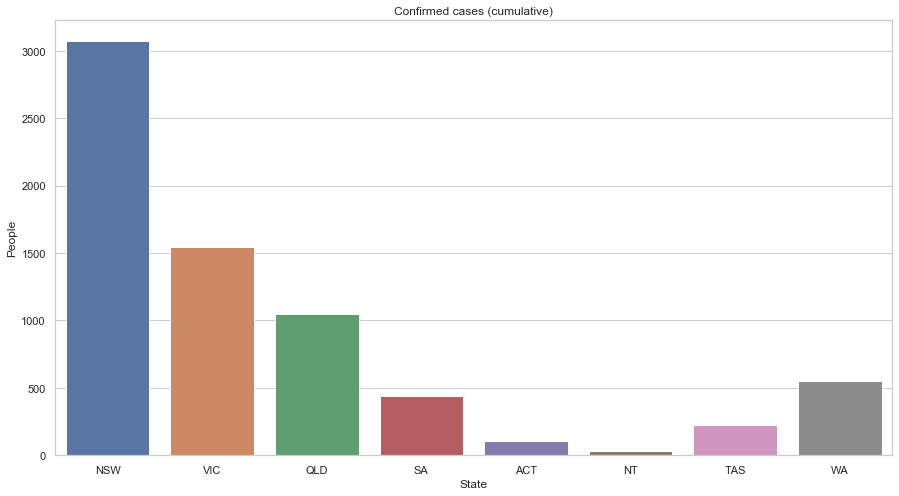

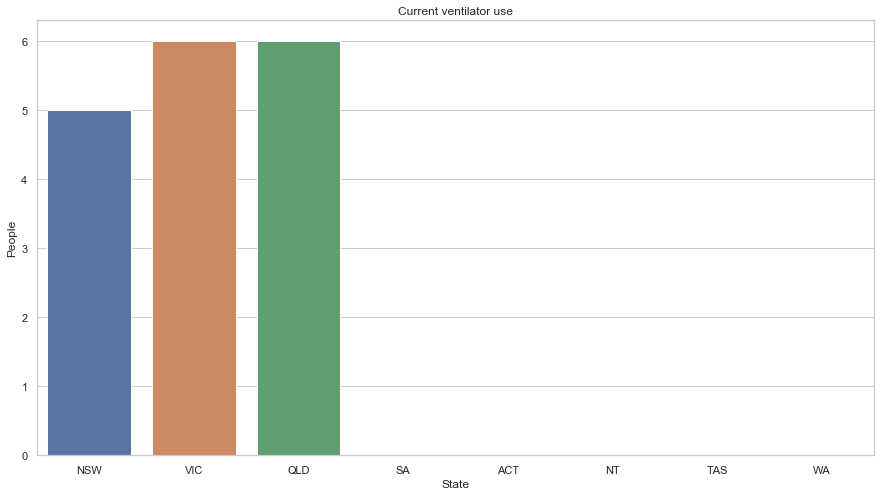

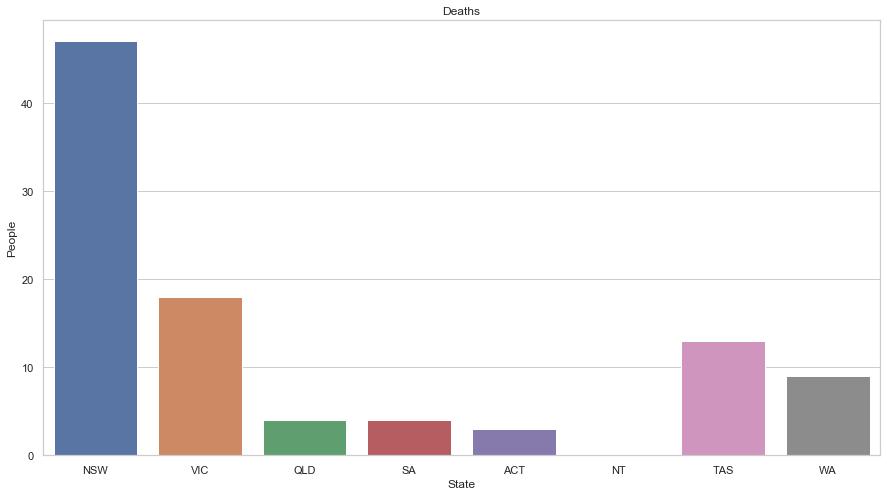

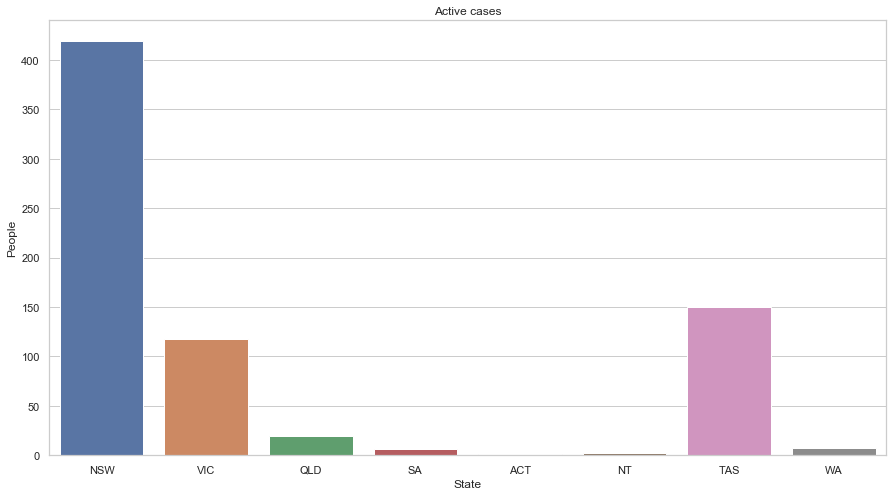

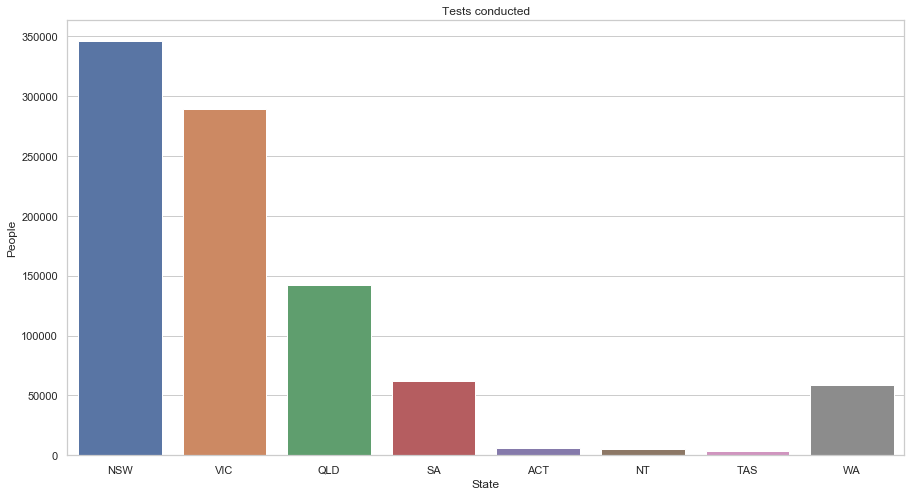

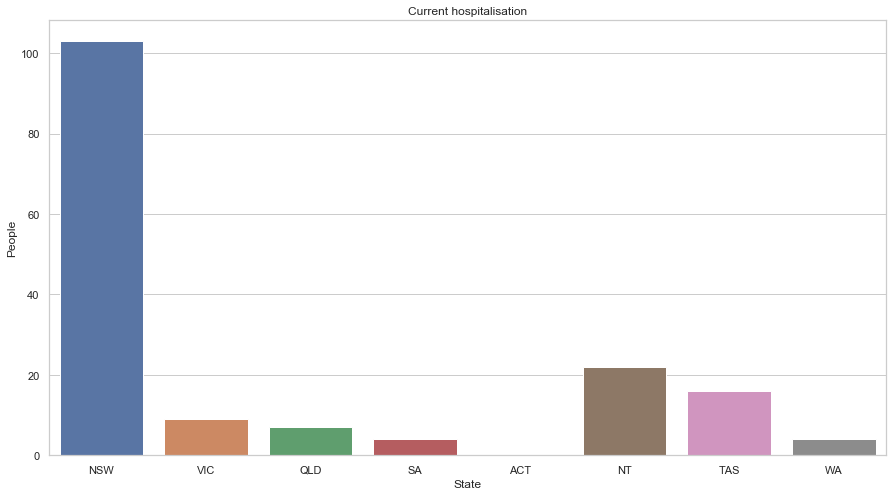

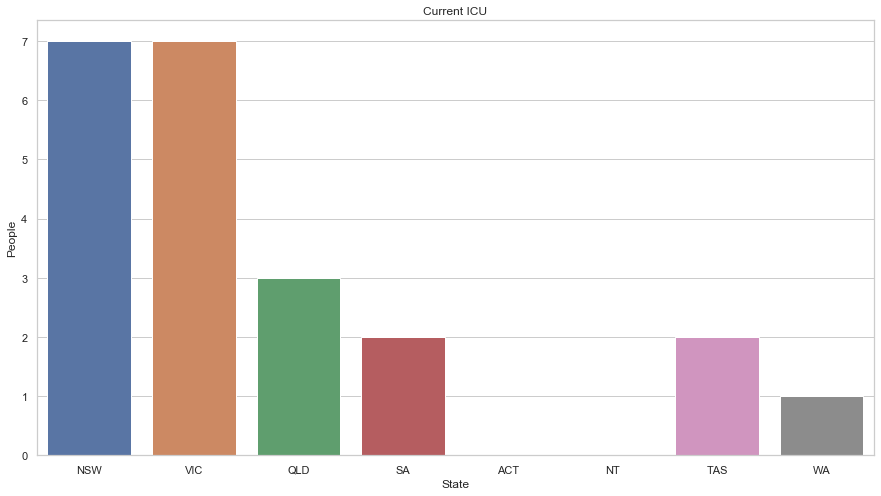

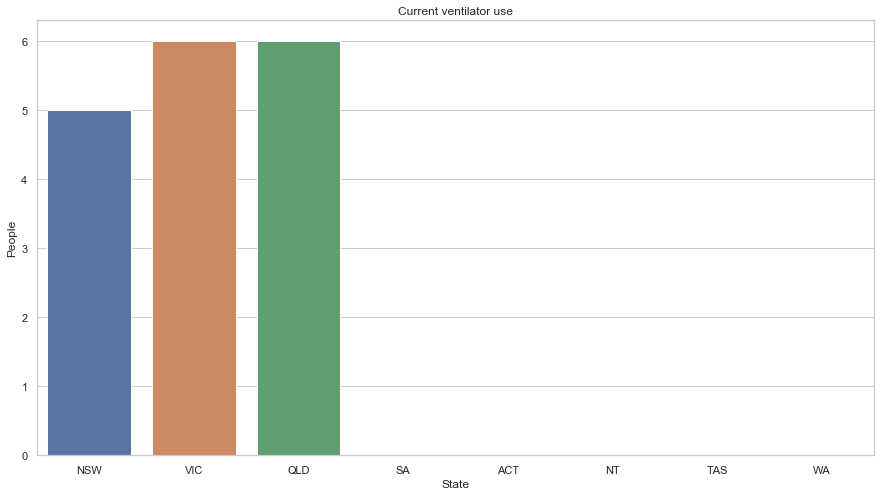

In [13]:
Show_latest_graphs()

In [14]:
def get_updates_hospitalisations(state_updates):

    _state_df=updates_df[(updates_df['State']==state_updates)]
    
    _state_df = _state_df.fillna(method='ffill')

    latest_data_plt=_state_df.plot(kind='area',x='Date',y='Hospitalisations (count)',figsize=(15,8),title='Hospitalisations (count)',fontsize=12,lw=12,color='c')
    latest_data_plt.set_title('Hospitalisations (Count)',fontsize=10)
    latest_data_plt.set_ylabel('People',fontsize=10)
    latest_data_plt.set_xlabel('Date',fontsize=10)
    latest_data_plt.get_legend().remove() 

    return(latest_data_plt)

#get_plots('VIC')
    

In [15]:
def get_updates_case_count(state_updates):

    _state_df=updates_df[(updates_df['State']==state_updates)]
    
    _state_df = _state_df.fillna(method='ffill')

    latest_data_plt=_state_df.plot(kind='line',x='Date',y='Cumulative case count',figsize=(15,8),title='Confirmed cases (cumulative)',fontsize=12,lw=6,color='r')
    latest_data_plt.set_title('Confirmed cases (cumulative)',fontsize=10)
    latest_data_plt.set_ylabel('People',fontsize=10)
    latest_data_plt.set_xlabel('Date',fontsize=10)
    latest_data_plt.get_legend().remove()

    return(latest_data_plt)

#get_plots('VIC')
    

In [16]:
def get_updates_deaths(state_updates):
    
    _state_df=updates_df[(updates_df['State']==state_updates)]
    
    _state_df = _state_df.fillna(method='ffill')
    
    latest_data_plt=_state_df.plot(kind='area',x='Date',y='Cumulative deaths',figsize=(15,8),title='Cumulative Deaths',fontsize=12,lw=12,color='m')
    latest_data_plt.set_title('Deaths in '+state_updates+' (Cumulative)',fontsize=10)
    latest_data_plt.set_ylabel('People',fontsize=10)
    latest_data_plt.set_xlabel('Date',fontsize=10)
    latest_data_plt.get_legend().remove()
    
    #return(latest_data_plt)

#get_updates_deaths('NSW')

In [17]:
def get_ventilator_usage(state_updates):
    
    _state_df=updates_df[(updates_df['State']==state_updates)]
    
    _state_df = _state_df.fillna(method='ffill')
    
    latest_data_plt=_state_df.plot(kind='area',x='Date',y='Ventilator usage (count)',figsize=(15,8),title='Ventilator usage (count)',fontsize=12,lw=12,color='m')
    latest_data_plt.set_title('Ventilator usage (count) '+state_updates+' (Cumulative)',fontsize=10)
    latest_data_plt.set_ylabel('People',fontsize=10)
    latest_data_plt.set_xlabel('Date',fontsize=10)
    latest_data_plt.get_legend().remove()

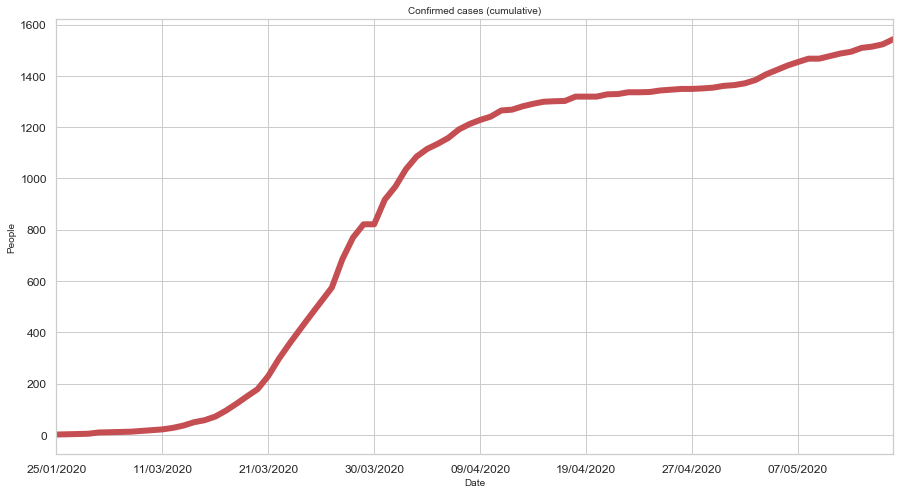

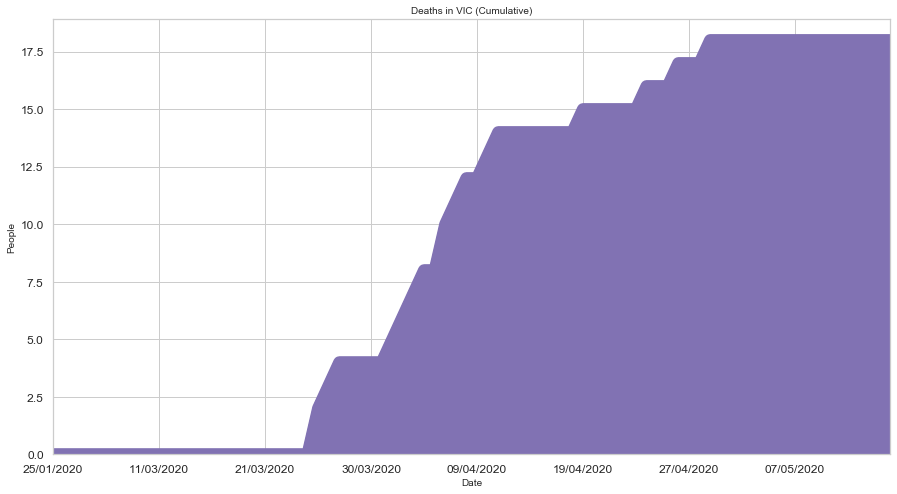

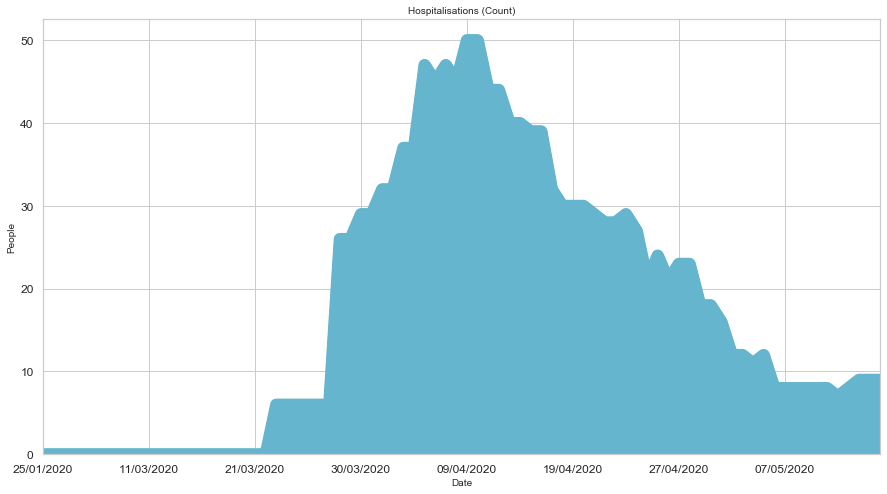

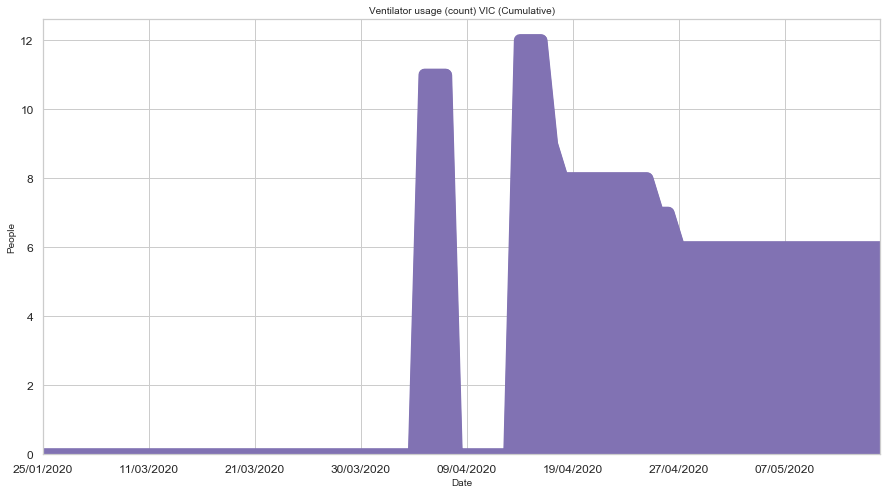

In [18]:
def show_trending(State):
    get_updates_case_count(State)
    get_updates_deaths(State)
    get_updates_hospitalisations(State)
    get_ventilator_usage(State)
    
show_trending('VIC')    
    

In [19]:
deaths_=(data['sheets']['deaths'])

print(deaths_)

deaths_list=[]

for each_row in deaths_:
    #print(deaths_)
    deaths_list_row=list(each_row.values())
    deaths_list.append(deaths_list_row)
    #updates_list_row=list(each_row.values())
    #updates_list.append(updates_list_row)  
    
print(len(deaths_list))

deaths_df=pd.DataFrame(deaths_list)

print(deaths_df.head())



[{'State': 'WA', 'Date of death': '01/03/2020', 'Date reported': '01/03/2020', 'Death No (in state)': '1', 'Name (if known)': '', 'Details': '78 year old man - Sir Charles Gairdner Hospital - Diamond Princess', 'Source': 'media release'}, {'State': 'NSW', 'Date of death': '03/03/2020', 'Date reported': '04/03/2020', 'Death No (in state)': '1', 'Name (if known)': '', 'Details': '95 year old woman', 'Source': 'media release'}, {'State': 'NSW', 'Date of death': '08/03/2020', 'Date reported': '08/03/2020', 'Death No (in state)': '2', 'Name (if known)': '', 'Details': '80 year old man - Dorothy Henderson Lodge', 'Source': 'media release'}, {'State': 'NSW', 'Date of death': '13/03/2020', 'Date reported': '15/03/2020', 'Death No (in state)': '3', 'Name (if known)': '', 'Details': '77 year old woman, died in Sydney Hospital', 'Source': 'media release'}, {'State': 'NSW', 'Date of death': '14/03/2020', 'Date reported': '15/03/2020', 'Death No (in state)': '4', 'Name (if known)': '', 'Details': '